In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import io
from sklearn.model_selection import train_test_split


In [ ]:
#importing dataset
from google.colab import files
data_to_load = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (10).csv


## **Data analysis and visualization**

In [ ]:
#creating the associated dataframe
df = pd.read_csv(io.BytesIO(data_to_load['healthcare-dataset-stroke-data.csv']))
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#id column is not relevant 
df.drop(columns=['id'],inplace=True) 

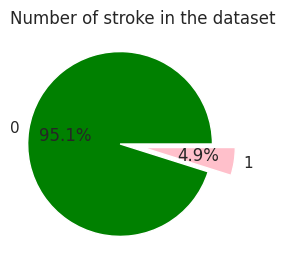

In [ ]:
#Count the number of stroke in the dataset
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["green","pink"]
explode = (0.25,0) 
 
plt.figure(figsize=(3,3))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False)

plt.title('Number of stroke in the dataset')
plt.show()

The dataset is **unbalanced** in the favor of non stroke, but it reflects well reality so we don't need to undersample or oversample for now



In [ ]:
#Let's start analyzing our data to see in which direction we can go 
data_numerical=df[['age','avg_glucose_level','bmi']]
data_categorical=df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status', 'stroke']]

<ipython-input-273-a87db095f158>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 1.0, 'KERNEL DENSITY ESTIMATE Plots for age, avg_glucose_level, bmi')

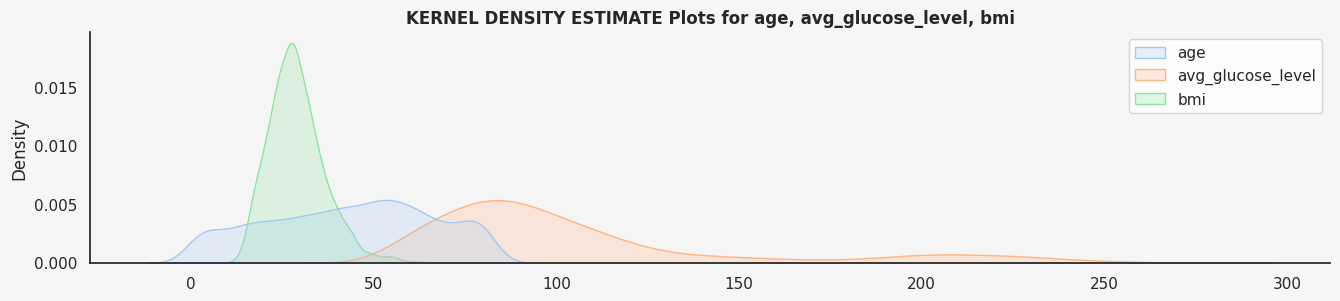

In [ ]:
#Let's analyze the coorelation between our numerical features first:
##kernel density estimate is a method for visualizing the distributions of observations in a dataset:
#kde represents the data using a continuous probability density curve.
fig, ax = plt.subplots(figsize = (16,3))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f5')
sns.kdeplot(data=data_numerical,shade=True,palette='pastel') # Distributions
#removing spines
for i in ["top","right"]:
    ax.spines[i].set_visible(False)
plt.title('KERNEL DENSITY ESTIMATE Plots for age, avg_glucose_level, bmi',weight='bold')

OBSERVATIONS:

*   Age appears to range between 0 and 100.
*   The average glucose level ranges between 50 and 150 and follows a Gaussian distribution with asymmetric tails.
*   BMI ranges between 0 and almost 50.


Text(0.5, 1.0, 'Distribution of BMI / Stroke')

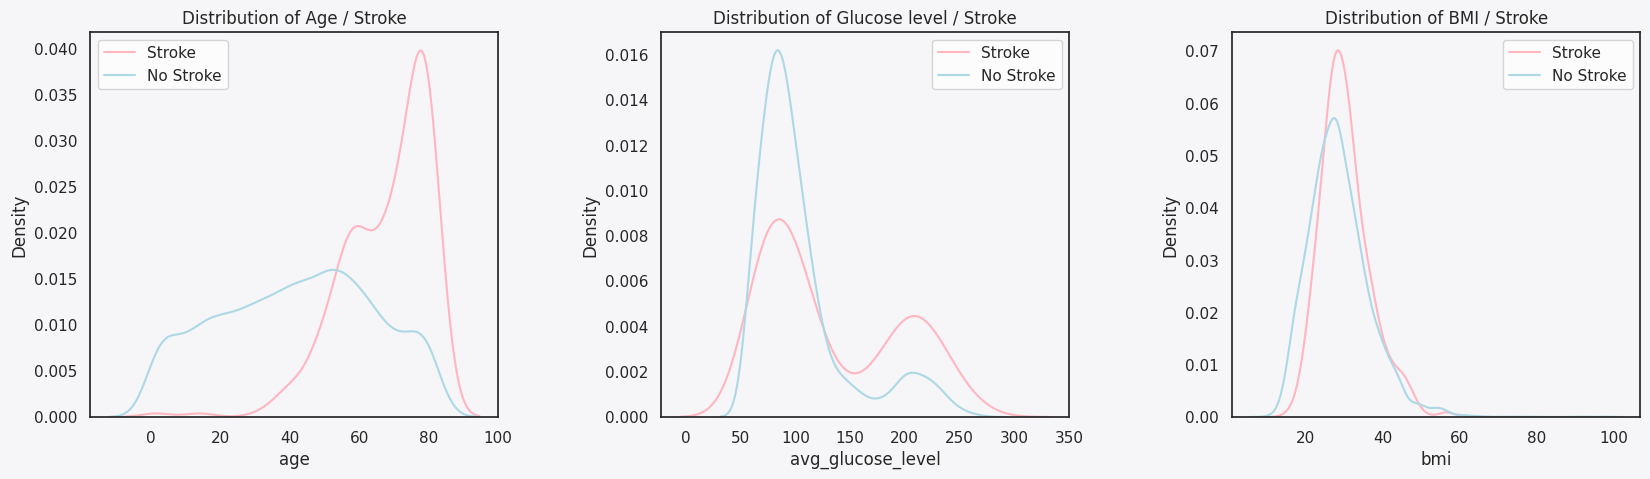

In [ ]:
# correlation of numerical variables with stroke 
fig = plt.figure(figsize=(20,5))
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.4, hspace=0.4)
# adding figures
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2= fig.add_subplot(gs[0,2])
axes=[ax0,ax1,ax2]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 

sns.kdeplot(ax=ax0,x=df.loc[df['stroke']==1]['age'],color='lightpink',label='Stroke')
sns.kdeplot(ax=ax0,x=df.loc[df['stroke']==0]['age'],color='lightblue',label='No Stroke')
ax0.legend(loc = 'upper left')
ax0.set_title('Distribution of Age / Stroke')


sns.kdeplot(ax=ax1,x=df.loc[df['stroke']==1]['avg_glucose_level'],color='lightpink',label='Stroke')
sns.kdeplot(ax=ax1,x=df.loc[df['stroke']==0]['avg_glucose_level'],color='lightblue',label='No Stroke')
ax1.legend(loc = 'upper right')
ax1.set_title('Distribution of Glucose level / Stroke')



sns.kdeplot(ax=ax2,x=df.loc[df['stroke']==1]['bmi'],color='lightpink',label='Stroke')
sns.kdeplot(ax=ax2,x=df.loc[df['stroke']==0]['bmi'],color='lightblue',label='No Stroke')
ax2.legend(loc = 'upper right')
ax2.set_title('Distribution of BMI / Stroke')


OBSERVATIONS:

1) 
*   It appears that individuals above the age of 60 are more likely to have a stroke.

2)
*   The "normal" average glucose level ranges between 70 and 100, and at this stage, the density curve for individuals who have not had a stroke is higher and wider than that of individuals who have had a stroke. This suggests that there is no clear relationship between the 'average glucose' variable and the likelihood of having a stroke for this range of values. 
* However, for an average glucose level greater than 150, the density curve for individuals who have had a stroke is higher and wider than that of individuals who have not had a stroke. This suggests that people with higher average glucose levels are more likely to have a stroke.
* In conclusion, while there is no clear relationship between average glucose levels and the likelihood of having a stroke for individuals with glucose levels between 70 and 100, a higher risk of stroke is observed for individuals with an average glucose level greater than 150

3)
*   A density curve for the BMI variable for individuals who have had a stroke is higher and wider than that of individuals who have not had a stroke, suggesting that individuals with a higher body mass index (BMI) are more likely to have a stroke.



Text(0.5, 1.0, 'BMI and Average Glucose')

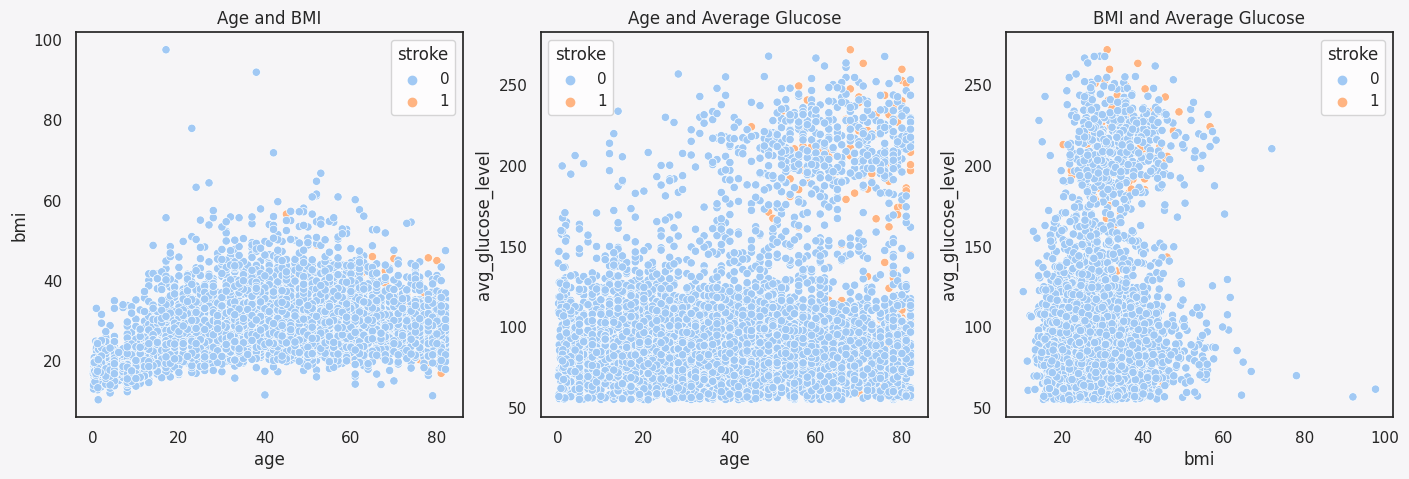

In [ ]:
#correlation of numerical varaible between themselves
fig = plt.figure(figsize=(17,5))
gs = fig.add_gridspec(1,3)
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
ax2=fig.add_subplot(gs[0,2])
axes=[ax0,ax1,ax2]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 
# Age and bmi
sns.scatterplot(ax=ax0,x=data_numerical['age'],y=data_numerical['bmi'],hue=data_categorical['stroke'],palette="pastel")
ax0.set_title('Age and BMI')
# Age and Glucose
sns.scatterplot(ax=ax1,x=data_numerical['age'],y=data_numerical['avg_glucose_level'],hue=data_categorical['stroke'],palette="pastel")
ax1.set_title('Age and Average Glucose')
# BMI and Glucose
sns.scatterplot(ax=ax2,x=data_numerical['bmi'],y=data_numerical['avg_glucose_level'],hue=data_categorical['stroke'],palette="pastel")
ax2.set_title('BMI and Average Glucose')


OBSERVATIONS:

* There doesn't appear to be a significant correlation between BMI and age. 
* Only a few cases of individuals with glucose levels less than 150 experienced a stroke. For those with glucose levels above 150, the risk of stroke appears to increase with age. 
* There are a few outliers in the data for BMI and age, as well as for BMI and average glucose levels. Given that there are only a few outliers, it may be appropriate to leave them in the data.

<Axes: xlabel='Residence_type', ylabel='stroke'>

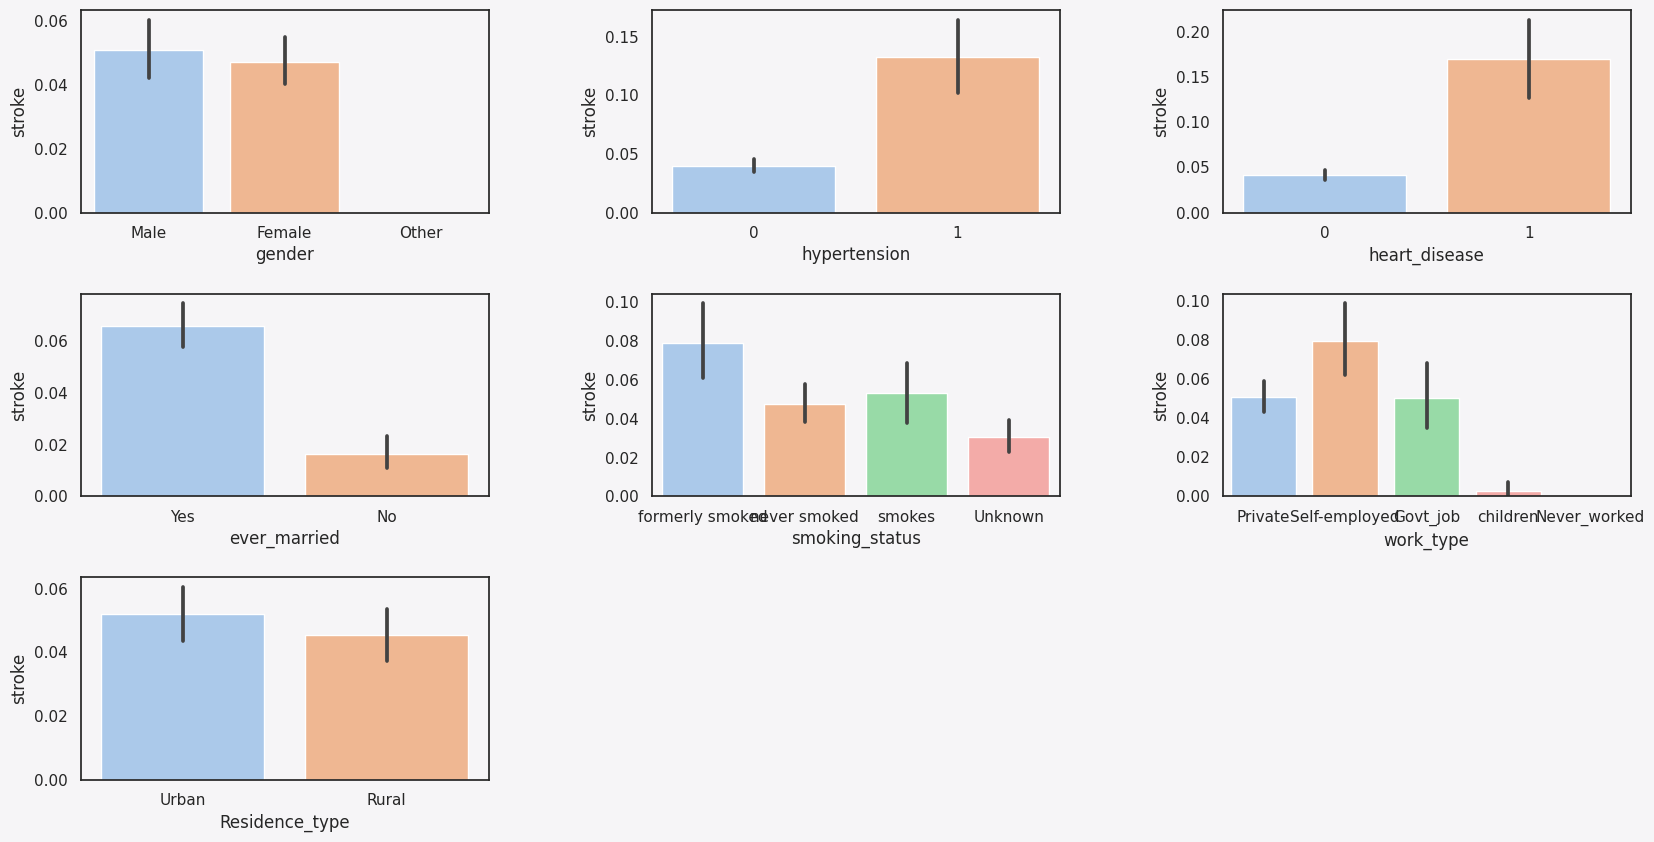

In [ ]:
# WITH CATEGORICAL DATA 
# correlation of numerical variables with stroke 
fig = plt.figure(figsize=(20,10))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.4, hspace=0.4)
# adding figures
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2= fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4= fig.add_subplot(gs[1,1])
ax5= fig.add_subplot(gs[1,2])
ax6= fig.add_subplot(gs[2,0])

axes=[ax0,ax1,ax2,ax3,ax4,ax5,ax6]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 

#influence of gender in strokes:
sns.barplot(ax=ax0,data=df,x='gender',y='stroke',palette='pastel')
#influence of hypertension on stroke
sns.barplot(ax=ax1,data=df,x='hypertension',y='stroke',palette='pastel')
#influence of heart disease on stroke
sns.barplot(ax=ax2,data=df,x='heart_disease',y='stroke',palette='pastel')
#Has ever been married impacts on strokes?
sns.barplot(ax=ax3,data=df,x='ever_married',y='stroke',palette='pastel')
#smoking status vs stroke
sns.barplot(ax=ax4,data=df,x='smoking_status',y='stroke',palette='pastel')
#work_type vs stroke
sns.barplot(ax=ax5,data=df,x='work_type',y='stroke',palette='pastel')
#residence_type vs stroke
sns.barplot(ax=ax6,data=df,x='Residence_type',y='stroke',palette='pastel')

OBSERVATIONS:


*   There does not appear to be any significant influence of gender on stroke.
*   Individuals with hypertension are more likely to have a stroke.
*   Individuals with heart disease are more likely to have a stroke.
*   Married individuals are more likely to have a stroke.
*   Individuals who formerly smoked and currently smoke are more likely to have a stroke.
*   Self-employed individuals are more likely to have a stroke.
*   There does not appear to be a significant difference in stroke risk between individuals living in urban and rural areas.



<Axes: xlabel='age', ylabel='ever_married'>

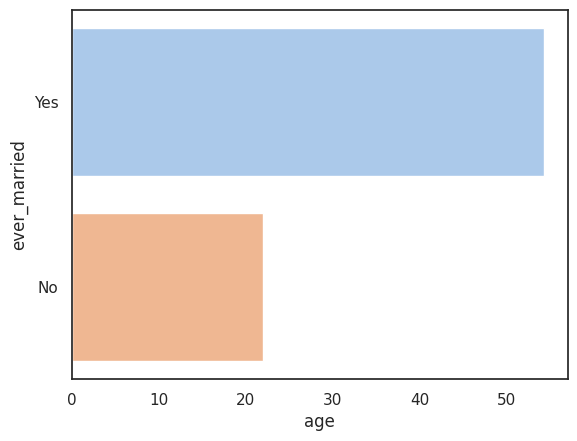

In [ ]:
# Link between being married and age
sns.barplot(data=df,x='age',y='ever_married',palette='pastel',errorbar=None)

==> people that have ever been married tend to be the ones that are older, thus the correlation is maybe due to the age rather than the marriage status.

<Axes: xlabel='age', ylabel='smoking_status'>

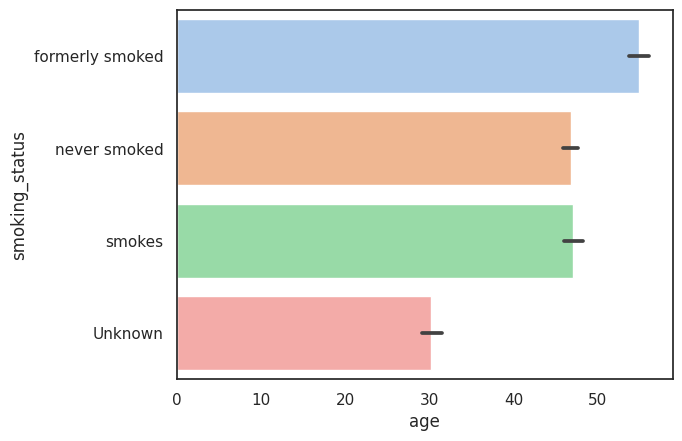

In [ ]:
# Link between smoking_status and age
sns.barplot(data=df,x='age',y='smoking_status',palette='pastel')

OBSERVATIONS

* If we compare those who have never smoked with those who smoke, we can conclude that smoking does not have such a big impact on strokes.
* However, patients who used to smoke were more susceptible to stroke.
* It is possible that the ex-smokers were older than the smokers, so the impact on the probability of stroke is due to age rather than being a former smoker.


<ipython-input-279-6f5e8fc41f9a>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



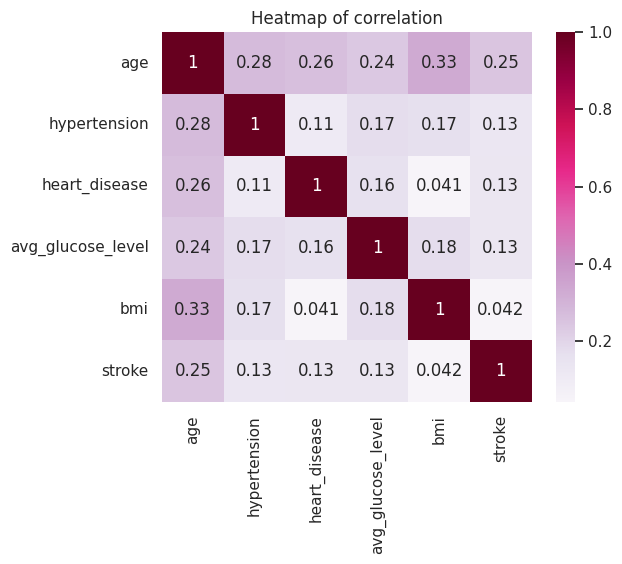

In [ ]:
# heatmap of numerical data
ax = plt.axes()
corrmat = df.corr()
sns.heatmap(data=corrmat,annot=True, cmap="PuRd",square=True)
ax.set_title('Heatmap of correlation')
plt.show()

=> From the observations we made regarding gender, marital status, and smoking status, as they don't have a significant impact, we will only perform the correlation analysis between the remaining features.

OBSERVATIONS:
* In general, the correlations are not significant, but it does not mean that they don't have an impact on the prediction.
* The highest correlation can be observed between BMI and age (but still not very significant) as we have seen before.
* It actually seems strange that the correlation between heart disease and hypertension is very weak.
* **In conclusion, for now, it seems that the variables that have the biggest influence on stroke are age, hypertension, heart disease, and self-employment.
However, our conclusions may change as we continue to analyze the data.** 

<Axes: >

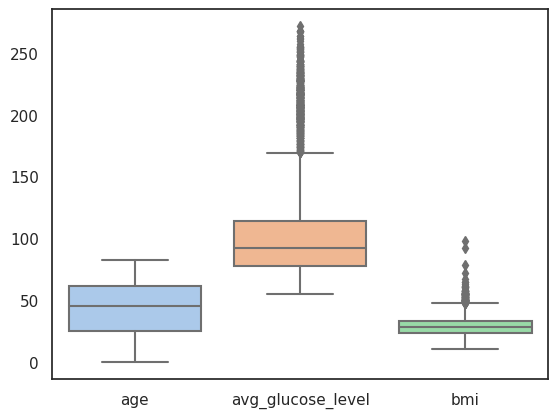

In [ ]:
#OUTLIERS : 
#checking outliers with boxplots :
#the only continous varaible are age, avg_glucose_level and bmi
sns.boxplot(data=df[['age','avg_glucose_level','bmi']],palette='pastel')

In [ ]:
fig = px.box(data_frame = df,
            x = "avg_glucose_level",
            width = 800,
            height = 300)
fig.show()
#large number of outliers -> too many to be considered outliers -> maybe diabetes 
#correler avec stroke 

In [ ]:
fig = px.box(data_frame = df,
            x = "age",
            width = 800,
            height = 300)
fig.show()
#no outliers 

In [ ]:
fig = px.box(data_frame = df,
            x = "bmi",
            width = 800,
            height = 300)
fig.show()
#there are outliers
#but these outliers may be interesting people,even if bmi is not very correlated with stroke, 
# we believe that it may be an important predictive feature when associated to others 
#(to be confirmed after testing with models )


## **PREPROCESSING**


REDUCTION OF DIMENSION

Since we have around 5000 data points and 12 features, which gives us 2^12=4096 possible combinations, it may not be necessary to perform dimensionality reduction. However, we could consider removing 1 or 2 features if it would improve accuracy (to be confirmed through testing).

We initially decided to remove the 'marital status' feature since it is highly correlated with age, as previously stated. However, since we are not completely certain about its impact on stroke prediction, we cannot afford to remove it based on this correlation alone.

After dropping the 'ever_married' feature, we tested our models and finally decided to keep it in our dataset for training.

In [ ]:
#deleting one row :

df.index[df['gender']=='Other'].tolist()
df.drop([3116],axis=0,inplace=True)
#df

In [ ]:
#converting qualitative data into binary variable

df['gender']=df['gender'].replace(['Male','Female'],[1,0])
#df['ever_married']=df['ever_married'].replace(['Yes','No'],[1,0])
df['Residence_type']=df['Residence_type'].replace(['Rural','Urban'],[1,0])
df['ever_married']=df['ever_married'].replace(['Yes','No'],[1,0])
#df


In [ ]:
# one_hot encoding for smoking statues:

pd.unique(df['smoking_status'])
smoker_type=pd.get_dummies(df['smoking_status'])
#adding dummies of smoking status to df
df=pd.concat((df,smoker_type),axis=1)
#df['smoking_status'] = df['smoking_status'].map({'never smoked': 0, 'Unknown': 1,'formerly smoked':2,'smokes':3})
df.drop('smoking_status',axis=1,inplace=True)
df=df.rename(columns={'Unknown':'Unknown_smoker'})
#df

In [ ]:
#one-hot encpding for work type:

pd.unique(df['work_type'])
work_type=pd.get_dummies(df['work_type'])
#adding dummies of smoking status to df
df=pd.concat((df,work_type),axis=1)
df.drop('work_type',axis=1,inplace=True)
#df

In [ ]:
#We added the stratifity parameter to make sur that that the test set contains 0 and 1:

X = df.drop('stroke', axis = 1)
y = df.stroke
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

#Number of 1 in the test set
print("Number of stroke before overSampling : {}".format(sum(y_test==1)))
print("Number of non stroke before overSampling : {} \n".format(sum(y_test==0)))

Number of stroke before overSampling : 50
Number of non stroke before overSampling : 972 



In [ ]:
#dealing with missing values by replacing by average value:

X_train.isnull().sum()
X_train['bmi'].replace([np.NaN], X_train['bmi'].mean(), inplace=True)
X_train

X_test.isnull().sum()
X_test['bmi'].replace([np.NaN], X_test['bmi'].mean(), inplace=True)
X_test

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Unknown_smoker,formerly smoked,never smoked,smokes,Govt_job,Never_worked,Private,Self-employed,children
3667,0,28.0,1,0,1,1,83.66,36.400000,0,0,1,0,1,0,0,0,0
2217,0,3.0,0,0,0,0,93.30,19.500000,1,0,0,0,0,0,0,0,1
374,0,53.0,0,0,1,1,64.40,31.000000,0,0,0,1,1,0,0,0,0
2392,1,35.0,0,0,1,1,69.22,42.800000,0,0,1,0,0,0,1,0,0
299,0,58.0,0,0,1,1,94.30,29.100000,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,0,24.0,1,0,0,0,107.22,35.300000,0,0,0,1,0,0,1,0,0
668,0,48.0,1,0,0,1,118.14,28.944817,0,1,0,0,0,0,1,0,0
4381,0,37.0,0,0,0,0,90.71,45.800000,1,0,0,0,0,0,0,1,0
2514,1,18.0,0,0,0,0,79.35,23.600000,1,0,0,0,0,0,1,0,0


STANDARDIZING / NORMALIZING
* StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. 
* StandardScaler results in a distribution with a standard deviation equal to 1.

In [ ]:
# STANDARDIZING our training and testing data.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#NORMALIZING 
#from sklearn.preprocessing import MinMaxScaler
#mms = MinMaxScaler()
#X_train=mms.fit_transform(X_train)
#X_test=mms.fit_transform(X_test)

#CAUTION : standardizing and normalizing are exclusive, we have better results with standardizing since our outliers are important
#for ou data.
#you can test with normalization by putting '#' you can comment standardscaler and uncomment normalizating 


OVERSAMPLING / UNDERSAMPLING

In [ ]:
#OVERSAMPLING

# We only oversample the train_set to avoid data leakage
# The reasons why we chose oversampling instead of undersampling are explained in the report.

print("Number of stroke before overSampling : {}".format(sum(y_train==1)))
print("Number of non stroke before overSampling : {} \n".format(sum(y_train==0)))


from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=4)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train.ravel())



print('After OverSampling, the shape of X_ train: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_over.shape))

print("Number of stroke after overSampling : {}".format(sum(y_train_over==1)))
print("Number of non stroke after overSampling : {}".format(sum(y_train_over==0)))

Number of stroke before overSampling : 199
Number of non stroke before overSampling : 3888 

After OverSampling, the shape of X_ train: (7776, 17)
After OverSampling, the shape of y_train: (7776,) 

Number of stroke after overSampling : 3888
Number of non stroke after overSampling : 3888


## **MODELLING**

In [ ]:
#STARTING TO TRAIN THE MODELS

from sklearn.model_selection import cross_validate 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [ ]:
def Model_orginial_data(model):
    scoring=['accuracy','roc_auc','precision','recall','f1']
    scores = cross_validate(estimator = model, X = X_train, y = y_train, cv = 10,scoring=scoring)   #K-Fold Validation
    print(model)
    print('Mean Accuracy Score train:', scores['test_accuracy'].mean())
    print('Mean ROC AUC Score train:', scores['test_roc_auc'].mean())
    print('Mean F1 Score train:', scores['test_f1'].mean())
    print('Mean Precision Score train:', scores['test_precision'].mean())
    print('Mean Recall Score train:', scores['test_recall'].mean())
 
def Model_oversampled_data(model):
    scoring=['accuracy','roc_auc','precision','recall','f1']
    scores = cross_validate(estimator = model, X = X_train_over, y = y_train_over, cv = 10,scoring=scoring)   #K-Fold Validation
    print("\nOVERSAMPLED",model)
    print('Mean Accuracy Score train:', scores['test_accuracy'].mean())
    print('Mean ROC AUC Score train:', scores['test_roc_auc'].mean())
    print('Mean F1 Score train:', scores['test_f1'].mean())
    print('Mean Precision Score train:', scores['test_precision'].mean())
    print('Mean Recall Score train:', scores['test_recall'].mean())
   


In [ ]:
result =[]
#function for fitting 
def best_parameters(i,j):
  scoring = {
    'roc_auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'accuracy': 'accuracy'
    }

  grid_search = GridSearchCV(estimator=i,param_grid = j, scoring=scoring,cv = 10,refit='f1')
  grid_search.fit(X_train_over, y_train_over)
  print("\nOVERSAMPLED WITH HYPERPARAMETRIZATION",i)
  best_param = grid_search.best_params_
  print('Best parameters  :', best_param)
  print('Best score accuracy :', grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])
  print('Best score ROC AUC :', grid_search.cv_results_['mean_test_roc_auc'][grid_search.best_index_])
  print('Best score F1 :', grid_search.cv_results_['mean_test_f1'][grid_search.best_index_])
  print('Best score precision :', grid_search.cv_results_['mean_test_precision'][grid_search.best_index_])
  print('Best score recall :', grid_search.cv_results_['mean_test_recall'][grid_search.best_index_])

F1 is our metric to compare model performance on the training set. In our case, for predicting stroke, we have decided that it is more important to prioritize true positives rather than distinguishing between true and false positives.

TEST OF SOME CLASSIFIERS:

**SVC**

In [ ]:
#SVC 

# Option 1 : 
# We could also have used this instead of oversampling.
#model=SVC(random_state=0,class_weight="balanced")

# Option 2
model=SVC(random_state=0)
Model_orginial_data(model)
print('')
Model_oversampled_data(model)
#tuning
i=SVC()
j=[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]
best_parameters(i,j)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/

SVC(random_state=0)
Mean Accuracy Score train: 0.9513093868354188
Mean ROC AUC Score train: 0.5977223953763773
Mean F1 Score train: 0.0
Mean Precision Score train: 0.0
Mean Recall Score train: 0.0


OVERSAMPLED SVC(random_state=0)
Mean Accuracy Score train: 0.8804063152392201
Mean ROC AUC Score train: 0.9497674568645872
Mean F1 Score train: 0.8886018758915364
Mean Precision Score train: 0.8319504555003496
Mean Recall Score train: 0.9537069673760369

OVERSAMPLED WITH HYPERPARAMETRIZATION SVC()
Best parameters  : {'C': 1, 'kernel': 'rbf', 'random_state': 0}
Best score accuracy : 0.8804063152392201
Best score ROC AUC : 0.9497674568645872
Best score F1 : 0.8886018758915364
Best score precision : 0.8319504555003496
Best score recall : 0.9537069673760369


* The accuracy decreases when we oversample the data.
* Since our data is unbalanced, the SVC model tends to predict the dominant class systematically.
* The model seems to be taking a compromise by always predicting 0 because if it tries to learn to predict 1, it will have more chances of making an error.
Therefore, the precision, recall, and F1 score cannot be calculated, and they are set to 0.
* The best choice here is to oversample the data to counter this naive approach.
* We tried a grid search to find the best parameters, which gave us a result of approximately 0.88 for F1 score.
The best parameters for SVC are {'C': 1, 'kernel': 'rbf', 'random_state': 0}.

**LogisticRegression**

In [ ]:
#LogisticRegression

model=LogisticRegression(random_state=0)
Model_orginial_data(model)
Model_oversampled_data(model)
#tuning
i=LogisticRegression()
j=[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]
best_parameters(i,j)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/

LogisticRegression(random_state=0)
Mean Accuracy Score train: 0.9513093868354188
Mean ROC AUC Score train: 0.8405807198640864
Mean F1 Score train: 0.0
Mean Precision Score train: 0.0
Mean Recall Score train: 0.0

OVERSAMPLED LogisticRegression(random_state=0)
Mean Accuracy Score train: 0.7889724833169564
Mean ROC AUC Score train: 0.8518014156019935
Mean F1 Score train: 0.7986938166350146
Mean Precision Score train: 0.7640484566643861
Mean Recall Score train: 0.8369404765059762

OVERSAMPLED WITH HYPERPARAMETRIZATION LogisticRegression()
Best parameters  : {'C': 0.5, 'random_state': 0}
Best score accuracy : 0.7892295527256967
Best score ROC AUC : 0.8518212410062667
Best score F1 : 0.7990484838702672
Best score precision : 0.7640652758126841
Best score recall : 0.8377116847321974


* It seems that the accuracy decreases when oversampling the data.
* However, the F1 score increases.
* The model appears to be taking a cautious approach and always predicting 0 to avoid making errors when predicting 1.
* Thus, to apply this model, we have to oversample the data.
* However, the model's performance is still not optimal. F1 score is less than 0.80

**KneighborsClassifier**

In [ ]:
#KneighborsClassifier
model=KNeighborsClassifier()
Model_orginial_data(model)
Model_oversampled_data(model)

i=KNeighborsClassifier()
j=[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]
best_parameters(i,j)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



KNeighborsClassifier()
Mean Accuracy Score train: 0.9478846061652044
Mean ROC AUC Score train: 0.6191298059286371
Mean F1 Score train: 0.017786561264822136
Mean Precision Score train: 0.08333333333333333
Mean Recall Score train: 0.01

OVERSAMPLED KNeighborsClassifier()
Mean Accuracy Score train: 0.9102379463561985
Mean ROC AUC Score train: 0.9626130150236367
Mean F1 Score train: 0.9169266729086087
Mean Precision Score train: 0.8542407471165816
Mean Recall Score train: 0.9897105981501604

OVERSAMPLED WITH HYPERPARAMETRIZATION KNeighborsClassifier()
Best parameters  : {'metric': 'manhattan', 'n_neighbors': 5}
Best score accuracy : 0.9245109229685067
Best score ROC AUC : 0.9707321542236593
Best score F1 : 0.9291636410152527
Best score precision : 0.8763564140287329
Best score recall : 0.9889393899239393


* Although the accuracy decreases when oversampling, the scores for precision, recall and F1 increase significantly.
* However, it appears that this model is not effective in predicting the minority class, as the scores for the positive class are very low.
* To overcome this issue, we need to oversample the data.


**DecisionTreeclassifier**

In [ ]:
#DecisionTreeclassifier

model=DecisionTreeClassifier(random_state=0)
Model_orginial_data(model)
Model_oversampled_data(model)
i=DecisionTreeClassifier()
j=[{'criterion':['gini','entropy'],'random_state':[0]}]
best_parameters(i,j)


DecisionTreeClassifier(random_state=0)
Mean Accuracy Score train: 0.9082452418620258
Mean ROC AUC Score train: 0.551144548189704
Mean F1 Score train: 0.1368240790524459
Mean Precision Score train: 0.12495994515717515
Mean Recall Score train: 0.15552631578947365

OVERSAMPLED DecisionTreeClassifier(random_state=0)
Mean Accuracy Score train: 0.9210459449534
Mean ROC AUC Score train: 0.9210442450905043
Mean F1 Score train: 0.9209975549348226
Mean Precision Score train: 0.9120878080771375
Mean Recall Score train: 0.9321078366416664

OVERSAMPLED WITH HYPERPARAMETRIZATION DecisionTreeClassifier()
Best parameters  : {'criterion': 'gini', 'random_state': 0}
Best score accuracy : 0.9210459449534
Best score ROC AUC : 0.9210442450905043
Best score F1 : 0.9209975549348226
Best score precision : 0.9120878080771375
Best score recall : 0.9321078366416664


* Here, the accuracy before and after oversampling seems to be quite similar.
* In fact, the DecisionTreeClassifier is useful for handling unbalanced data.
* However, the other metrics, such as precision, recall, and F1 score, increase significantly after oversampling, which validates the performance of the classifier.
* Therefore, we will use the oversampled data for further analysis.
* When fitting with the best parameters, it appears that the default model is already the best in this case, with an F1 score of 0.90 average.

**RandomForestClassifier**

In [ ]:
#RandomForestClassifier

model=RandomForestClassifier(random_state=0)
Model_orginial_data(model)
Model_oversampled_data(model)
i=RandomForestClassifier()
j=[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]
best_parameters(i,j)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



RandomForestClassifier(random_state=0)
Mean Accuracy Score train: 0.9495960976077473
Mean ROC AUC Score train: 0.808068988369806
Mean F1 Score train: 0.009523809523809523
Mean Precision Score train: 0.1
Mean Recall Score train: 0.005

OVERSAMPLED RandomForestClassifier(random_state=0)
Mean Accuracy Score train: 0.9625808511412626
Mean ROC AUC Score train: 0.9937277998904085
Mean F1 Score train: 0.9627713597065259
Mean Precision Score train: 0.9491359460205591
Mean Recall Score train: 0.9773699414305781

OVERSAMPLED WITH HYPERPARAMETRIZATION RandomForestClassifier()
Best parameters  : {'criterion': 'entropy', 'n_estimators': 150, 'random_state': 0}
Best score accuracy : 0.9642527948440544
Best score ROC AUC : 0.9936926617458333
Best score F1 : 0.9643676033480233
Best score precision : 0.9520470446424572
Best score recall : 0.977627673389341


* Here, the accuracy before and after oversampling seems to be quite similar: Random Forest Classifier is known to handle unbalanced data well. However, the scores increase significantly after oversampling, indicating an improvement in the classifier's performance.

* After oversampling, precision and recall increased, which suggests that the model was able to better learn to predict the minority class. Therefore, the oversampled Random Forest Classifier gives us the best results overall.

* Finally, using grid search, we were able to obtain even better results with hyperparameters {'criterion': 'entropy', 'n_estimators': 150, 'random_state': 0}.

**XGBClasifier**

In [ ]:
#XGBClasifier
model=XGBClassifier(eval_metric= 'error')
Model_orginial_data(model)
Model_oversampled_data(model)
i=XGBClassifier()
j=[{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}]
best_parameters(i,j)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Mean Accuracy Score train: 0.9444580277098614
Mean ROC AUC Score train: 0.8151196338678833
Mean F1 Score train: 0.09922312470138558
Mean Precision Score train: 0.2866666666666666
Mean Recall Score train: 0.06526315789473684

OVERSAMPLED XGBClass

* Here, the accuracy before and after oversampling seems to be almost the same: XGB is actually efficient in handling unbalanced data.
* The XGBoost classifier is generally considered to be good for unbalanced data because it includes a regularization term in its objective function, which can help prevent overfitting to the majority class and improve the model's ability to classify the minority class. The score also increases after oversampling.
* Before oversampling, the recall and F1 scores are low, indicating that the model is struggling to identify true positive values in the dataset. However, the AUC-ROC score is good, which shows that the model doesn't struggle a lot to distinguish between positive and negative classes.
* However, after oversampling the dataset, performance increased for those metrics.
* F1 has increased, indicating that the model has identified more true positive values.
* The results of the oversampled data are better.
* After hyperparameter tuning, the F1 score greater than 0.9, which is an improvement over the default parameters.

----------------------------------------------------------------------------------------------
* Finally, it seems that the Random Forest classifier and XGB (both hyperparameterized) have the best performance with cross-validation on the training set for the oversampled data.
* Therefore, the Random Forest model appears to be the best option in this case.
* Next, we will evaluate the performance of the RandomForest model on the test set.

# **EVALUATION**


RADNDOM FOREST MODEL

In [ ]:
def eval(classifier,nom):
  print('Results after fitting with best parameters according to GridSearch')
  classifier.fit(X_train_over, y_train_over)
  y_pred = classifier.predict(X_test)
  y_prob = classifier.predict_proba(X_test)[:,1]
  cm = confusion_matrix(y_test, y_pred)
  result.append(accuracy_score(y_test, y_pred))
  acc=accuracy_score(y_test, y_pred)
  roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
  precision = precision_score(y_test, y_pred)  #Precision Score
  recall = recall_score(y_test, y_pred)  #Recall Score
  f1 = f1_score(y_test, y_pred)  #F1 Score
  print('\tAccuracy Score: ',acc,'\n\tROC AUC Score: {:.2f}'.format(roc),'\n\tPrecision: {:.2f}'.format(precision),'\n\tRecall: {:.2f}'.format(recall),'\n\tF1: {:.2f}'.format(f1))

  #Visualizing Confusion Matrix
  plt.figure(figsize = (6, 4))
  sns.heatmap(cm, cmap = 'PuRd', annot = True, fmt = 'd', linewidths = 4, cbar = False, annot_kws = {'fontsize': 10}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
  plt.yticks(rotation = 0)
  plt.show()

  # Visualizing Roc AUC Curve
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  sns.set_theme(style = 'white')
  plt.figure(figsize = (8, 8))
  plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
  plt.axis('tight')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend()
  plt.show()

Results after fitting with best parameters according to GridSearch
	Accuracy Score:  0.923679060665362 
	ROC AUC Score: 0.57 
	Precision: 0.20 
	Recall: 0.18 
	F1: 0.19


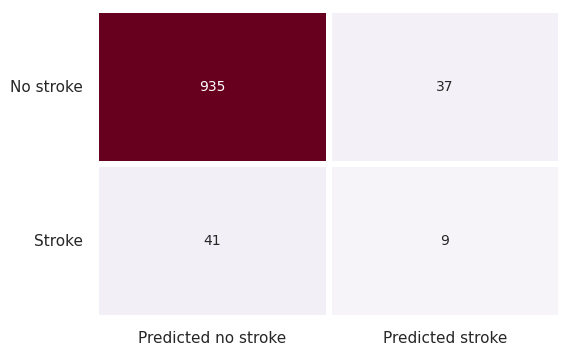

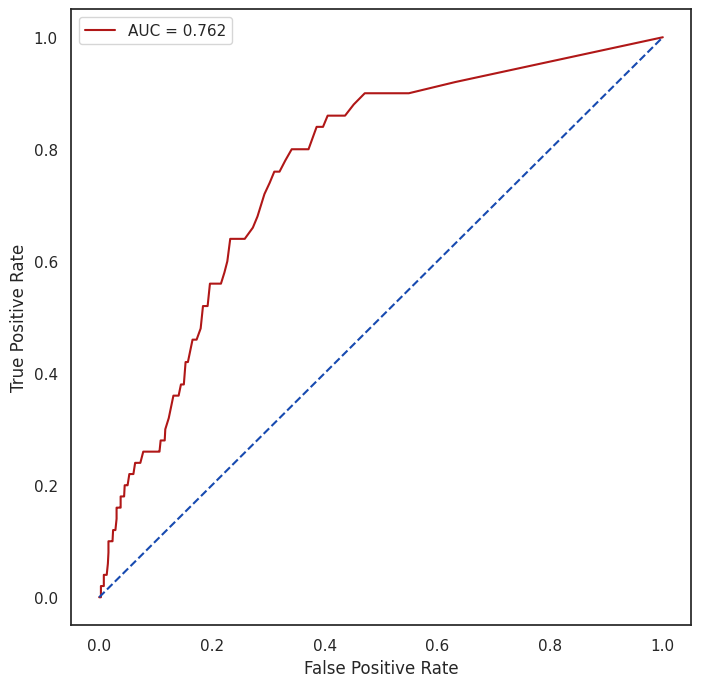

In [ ]:
#Fitting RandomForestClassifier

classifier_best = RandomForestClassifier(criterion='entropy', n_estimators= 150, random_state= 0)
eval(classifier_best,"RandomForestClassifier")

* Based on these results, the RandomForestClassifier achieved a high accuracy score of 0.93, indicating that it correctly classified a large proportion of the data points. However, the low ROC AUC score of 0.57 suggests that the model is not performing well in terms of distinguishing between positive and negative instances.

* The precision score of 0.24 suggests that the model is correctly identifying only 24% of the positive instances, while the recall score of 0.16 indicates that it is missing a significant proportion of the positive instances.

* The F1 score of 0.19 reflects the balance between precision and recall, and indicates that the model may not be performing as well as we would like in terms of correctly identifying positive instances.

* In summary, while the high accuracy score is promising, the low ROC AUC score and low precision and recall scores suggest that the model may not be performing well for this specific problem of stroke prediction.

<Axes: >

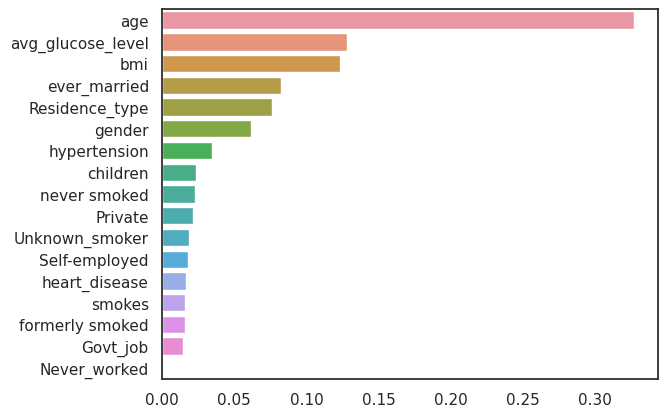

In [ ]:
#Let's see what are the most important features according to our best classfier

x=df.drop('stroke',axis=1)
feature_important=pd.Series(classifier_best.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_important
sns.barplot(x=feature_important,y=feature_important.index)

==> It seems that the most important features for our prediction are : age, avg_glucose_level, and bmi